## Categorical_Encoding

### Import Library

In [1]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("clean data/clean_data_train.csv")


In [4]:
df = df.drop(columns=['Dia chi'])

In [5]:
frame = df
frame.head()

,Gia,Dien tich,Gia/m²,Huong dat,Loai hinh dat,Chieu ngang,Chieu dai,Quan
0,3.15,100.0,31.50,Tây Bắc,Đất nền dự án,5.0,20.0,Ngũ Hành Sơn
1,2.50,79.0,31.65,Đông Nam,Đất thổ cư,6.0,14.0,Sơn Trà
2,2.10,125.0,16.80,Đông Bắc,Đất thổ cư,4.2,31.0,Liên Chiểu
3,5.90,220.0,26.82,Tây Nam,Đất thổ cư,10.0,22.0,Cẩm Lệ
4,3.50,88.0,39.77,Đông Bắc,Đất thổ cư,5.0,17.5,Cẩm Lệ


In [6]:
# Cột mục tiêu
target_col = 'Gia'  # Thay thế bằng tên cột mục tiêu của bạn
# Các cột phân loại
categorical_cols = ['Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ mã hóa target
encoder = TargetEncoder(cols=categorical_cols)
# Mã hóa các cột phân loại bằng target encoding
encoded_data = encoder.fit_transform(frame[categorical_cols], frame[target_col])
# Tạo DataFrame từ dữ liệu đã mã hóa và đặt lại tên cột giống như cột gốc
encoded_df = pd.DataFrame(encoded_data, columns=categorical_cols)
# Kết hợp dữ liệu đã mã hóa vào DataFrame gốc mà không thay đổi tên cột
frame = frame.drop(categorical_cols, axis=1).reset_index(drop=True)
frame = pd.concat([frame, encoded_df], axis=1)

continuous_cols = ['Dien tich', 'Gia/m²', 'Chieu ngang', 'Chieu dai', 'Huong dat', 'Loai hinh dat', 'Quan']
# Tạo bộ chuẩn hóa dữ liệu
scaler = StandardScaler()
# Chuẩn hóa các cột liên tục
frame[continuous_cols] = scaler.fit_transform(frame[continuous_cols])
# Hiển thị 5 hàng đầu tiên của dữ liệu đã xử lý
frame.head()


,Gia,Dien tich,Gia/m²,Chieu ngang,Chieu dai,Huong dat,Loai hinh dat,Quan
0,3.15,-0.456774,-0.195102,-0.519699,-0.038198,-0.678012,-1.041156,0.011057
1,2.50,-0.842025,-0.189120,-0.082630,-1.643005,-0.408889,0.960471,2.672244
2,2.10,0.001859,-0.781291,-0.869355,2.903947,1.210937,0.960471,-0.601389
3,5.90,1.744663,-0.381725,1.665649,0.496737,1.392671,0.960471,0.265825
4,3.50,-0.676918,0.134679,-0.519699,-0.706867,1.210937,0.960471,0.265825


In [7]:
frame.info()
frame.to_csv('clean data\\clean_data_train_encoded.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gia            1290 non-null   float64
 1   Dien tich      1290 non-null   float64
 2   Gia/m²         1290 non-null   float64
 3   Chieu ngang    1290 non-null   float64
 4   Chieu dai      1290 non-null   float64
 5   Huong dat      1290 non-null   float64
 6   Loai hinh dat  1290 non-null   float64
 7   Quan           1290 non-null   float64
dtypes: float64(8)
memory usage: 80.8 KB


## GradientBoostingRegression

In [7]:
# Import các thư viện cần thiết
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)
# Khởi tạo mô hình Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=365)
# Huấn luyện mô hình trên tập huấn luyện
reg.fit(X_train, y_train)
# Bước 4: Dự đoán trên tập kiểm tra
y_pred = reg.predict(X_test)

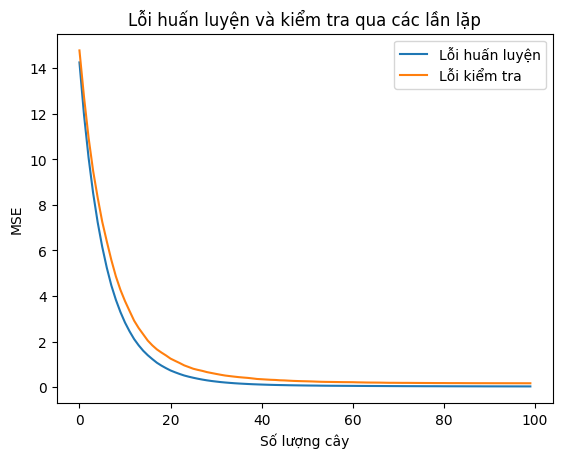

In [8]:
# Lấy thông tin về lỗi huấn luyện trong quá trình huấn luyện
train_loss = reg.train_score_
# Tính toán lỗi kiểm tra (test_loss) cho mỗi giai đoạn của quá trình huấn luyện
test_loss = []
for y_pred_stage in reg.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred_stage)
    test_loss.append(mse)
# Vẽ biểu đồ lỗi huấn luyện và kiểm tra qua các lần lặp
plt.figure()
plt.plot(train_loss, label='Lỗi huấn luyện')
plt.plot(test_loss, label='Lỗi kiểm tra')
plt.xlabel('Số lượng cây')
plt.ylabel('MSE')
plt.title('Lỗi huấn luyện và kiểm tra qua các lần lặp')
plt.legend()
plt.show()



- Lỗi của tập kiểm tra cao hơn tập huấn luyện trên mọi giá trị số lượng cây

In [9]:
# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print(f"\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")


So sánh:
Train MAE: 0.1072 vs Test MAE: 0.1952
Train MSE: 0.0334 vs Test MSE: 0.1717
Train RMSE: 0.1826 vs Test RMSE: 0.4143
Train R^2: 0.9980 vs Test R^2: 0.9899


- MAE của tập huấn luyện là 0.1072, thấp hơn đáng kể so với MAE của tập kiểm tra là 0.1952
- MSE của tập huấn luyện là 0.0334, rất thấp so với MSE của tập kiểm tra là 0.1717. 
- Giá trị R^2 của tập huấn luyện là 0.9980, rất gần với giá trị hoàn hảo là 1. Trong khi đó, R^2 của tập kiểm tra là 0.9899, vẫn là một giá trị cao nhưng thấp hơn so với tập huấn luyện

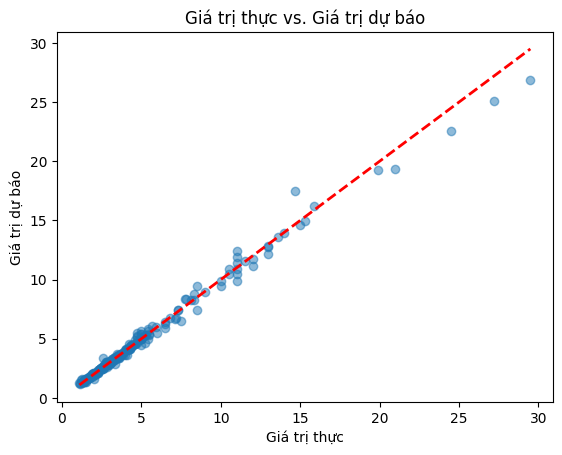

In [10]:
# Biểu đồ phân tán giữa giá trị thực và giá trị dự báo
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự báo')
plt.title('Giá trị thực vs. Giá trị dự báo')
# Vẽ đường chéo (45 độ) trên biểu đồ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.show()


- Giá trị dự đoán tập trung quanh đường chéo 45 độ. Giá càng tăng khả năng rời xa đường chéo càng lớn

In [11]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}
A = pd.DataFrame(data)
# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)
# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
878,1.479976,1.48,0.0016
768,1.349840,1.35,0.0119
344,2.250515,2.25,0.0229
655,2.451150,2.45,0.0470
641,3.497870,3.50,0.0609
...,...,...,...
225,17.520328,14.70,19.1859
368,1.598508,2.00,20.0746
846,1.504245,1.20,25.3538
892,1.588743,1.25,27.0994


- Sai lệch giao động từ 0.0016 đến 29.9044

In [12]:
B['% sai lech'].describe()

count    258.000000
mean       3.874496
std        4.501251
min        0.001600
25%        0.860475
50%        2.145600
75%        5.614975
max       29.904400
Name: % sai lech, dtype: float64

- Có 258 mẫu, giá trị trung bình 3.874496
- Độ lệch chuẩn của dữ liệu là 4.501251. Độ lệch chuẩn này khá lớn so với giá trị trung bình, cho thấy rằng dữ liệu có sự phân tán cao và phân phối rộng.
- 75% giá trị sai số dưới mức 5.614975

In [13]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

0.41434273919610326

- Sai lệch giá trung bình khoảng 414 triệu

### Kiem tra mo hinh bang ky thuat multiple test sets

In [14]:
data = frame  

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)
num_splits = 10
X_test_splits = np.array_split(X_test, num_splits)
y_test_splits = np.array_split(y_test, num_splits)
reg = GradientBoostingRegressor(random_state=365)
reg.fit(X_train, y_train)
# Đánh giá mô hình trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = round(mean_absolute_error(y_train, y_train_pred), 4)
train_mse = round(mean_squared_error(y_train, y_train_pred), 4)
train_rmse = round(np.sqrt(train_mse), 4)
train_r2 = round(r2_score(y_train, y_train_pred), 4)

print(f'Train          MAE: {train_mae:<8} MSE: {train_mse:<8} RMSE: {train_rmse:<8} R^2: {train_r2:<8}')
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
for i in range(num_splits):
    X_test_part = X_test_splits[i]
    y_test_part = y_test_splits[i]
    y_pred_part = reg.predict(X_test_part)
    mae = round(mean_absolute_error(y_test_part, y_pred_part), 4)
    mse = round(mean_squared_error(y_test_part, y_pred_part), 4)
    rmse = round(np.sqrt(mse), 4)
    r2 = round(r2_score(y_test_part, y_pred_part), 4)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    print(f'Test split {(i+1):<2}: MAE: {mae:<8} MSE: {mse:<8} RMSE: {rmse:<8} R²: {r2:<8}')
mean_mae = round(np.mean(mae_list), 4)
mean_mse = round(np.mean(mse_list), 4)
mean_rmse = round(np.mean(rmse_list), 4)
mean_r2 = round(np.mean(r2_list), 4)
print(f'\nAverage metrics across all test splits:')
print(f'Mean Absolute Error (MAE): {mean_mae}')
print(f'Mean Squared Error (MSE): {mean_mse}')
print(f'Mean Root Mean Squared Error (RMSE): {mean_rmse}')
print(f'Mean R² Score: {mean_r2:}')


Train          MAE: 0.1183   MSE: 0.0442   RMSE: 0.2102   R^2: 0.9975  
Test split 1 : MAE: 0.2271   MSE: 0.1896   RMSE: 0.4354   R²: 0.9905  
Test split 2 : MAE: 0.1488   MSE: 0.192    RMSE: 0.4382   R²: 0.9929  
Test split 3 : MAE: 0.2619   MSE: 0.1865   RMSE: 0.4319   R²: 0.9914  
Test split 4 : MAE: 0.3384   MSE: 0.4725   RMSE: 0.6874   R²: 0.9796  
Test split 5 : MAE: 0.1763   MSE: 0.1083   RMSE: 0.3291   R²: 0.9855  
Test split 6 : MAE: 0.2025   MSE: 0.1275   RMSE: 0.3571   R²: 0.9862  
Test split 7 : MAE: 0.145    MSE: 0.0774   RMSE: 0.2782   R²: 0.9829  
Test split 8 : MAE: 0.2207   MSE: 0.1228   RMSE: 0.3504   R²: 0.9893  
Test split 9 : MAE: 0.306    MSE: 0.5672   RMSE: 0.7531   R²: 0.9507  
Test split 10: MAE: 0.1793   MSE: 0.0876   RMSE: 0.296    R²: 0.9917  

Average metrics across all test splits:
Mean Absolute Error (MAE): 0.2206
Mean Squared Error (MSE): 0.2131
Mean Root Mean Squared Error (RMSE): 0.4357
Mean R² Score: 0.9841


C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


- Chỉ số R^2 tốt giao động trên 97%
- MAE, MSE và RMSE trên các phần test đều có sự biến thiên đáng kể. Điều này cho thấy mô hình có thể đã học quá kỹ các đặc trưng của tập huấn luyện. làm giảm hiệu suất khi dự đoán trên dữ liệu mới.

### Kiem tra mo hinh bang ky thuat cross-validation

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = frame  
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)
reg = GradientBoostingRegressor(random_state=365)

kf = KFold(n_splits=10, shuffle=True, random_state=365)
cv_mae = []
cv_mse = []
cv_rmse = []
cv_r2 = []
 
fold = 1
for train_index, test_index in kf.split(X):
    X_cv_train, X_cv_test = X.iloc[train_index], X.iloc[test_index]
    y_cv_train, y_cv_test = y.iloc[train_index], y.iloc[test_index]
 
    reg.fit(X_cv_train, y_cv_train)
    y_cv_pred = reg.predict(X_cv_test)
 
    fold_mae = mean_absolute_error(y_cv_test, y_cv_pred)
    fold_mse = mean_squared_error(y_cv_test, y_cv_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred))
    fold_r2 = r2_score(y_cv_test, y_cv_pred)
 
    cv_mae.append(fold_mae)
    cv_mse.append(fold_mse)
    cv_rmse.append(fold_rmse)
    cv_r2.append(fold_r2)
 
    # In ra các chỉ số của mỗi fold
    print(f"Fold {fold}: MAE: {fold_mae:.4f}, MSE: {fold_mse:.4f}, RMSE: {fold_rmse:.4f}, R^2: {fold_r2:.4f}")
    fold += 1
 
# In ra các chỉ số trung bình của cross-validation
print(f"\nCross-Validation Mean MAE: {np.mean(cv_mae):.4f}")
print(f"Cross-Validation Mean MSE: {np.mean(cv_mse):.4f}")
print(f"Cross-Validation Mean RMSE: {np.mean(cv_rmse):.4f}")
print(f"Cross-Validation Mean R^2: {np.mean(cv_r2):.4f}")

Fold 1: MAE: 0.1904, MSE: 0.1712, RMSE: 0.4138, R^2: 0.9919
Fold 2: MAE: 0.1799, MSE: 0.1231, RMSE: 0.3508, R^2: 0.9904
Fold 3: MAE: 0.1853, MSE: 0.1675, RMSE: 0.4093, R^2: 0.9844
Fold 4: MAE: 0.1991, MSE: 0.1575, RMSE: 0.3969, R^2: 0.9832
Fold 5: MAE: 0.2575, MSE: 0.2831, RMSE: 0.5321, R^2: 0.9840
Fold 6: MAE: 0.2921, MSE: 0.4592, RMSE: 0.6776, R^2: 0.9812
Fold 7: MAE: 0.2131, MSE: 0.2441, RMSE: 0.4941, R^2: 0.9743
Fold 8: MAE: 0.2253, MSE: 0.3124, RMSE: 0.5589, R^2: 0.9856
Fold 9: MAE: 0.1979, MSE: 0.1462, RMSE: 0.3824, R^2: 0.9928
Fold 10: MAE: 0.2112, MSE: 0.1800, RMSE: 0.4242, R^2: 0.9917

Cross-Validation Mean MAE: 0.2152
Cross-Validation Mean MSE: 0.2244
Cross-Validation Mean RMSE: 0.4640
Cross-Validation Mean R^2: 0.9859


### Hieu chinh mo hinh

In [15]:
data = frame

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Tạo danh sách các giá trị `random_state` để thử nghiệm
random_states = list(range(0,3000))  # Danh sách từ 0 đến 2000 (bao gồm cả 2000)

# Khởi tạo biến để lưu trữ kết quả tốt nhất
best_mae = float('inf')  # Giá trị MAE tốt nhất (ban đầu là vô cùng)
best_random_state = None  # Giá trị `random_state` tốt nhất

# Lặp qua các giá trị `random_state` để tìm giá trị tốt nhất
for random_state in random_states:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Khởi tạo và huấn luyện mô hình Gradient Boosting Regressor
    reg = GradientBoostingRegressor(random_state=random_state)
    reg.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = reg.predict(X_test)
    
    # Tính toán chỉ số MAE trên tập kiểm tra
    mae = mean_absolute_error(y_test, y_pred)
    if mae < best_mae:
        best_mae = mae
        best_random_state = random_state
    
    # In kết quả của giá trị `random_state` hiện tại
    print(f"random_state = {random_state}: MAE = {mae:.4f}")

# In ra giá trị `random_state` tốt nhất và MAE tương ứng
print(f"\nGiá trị random_state tốt nhất: {best_random_state}")
print(f"MAE tốt nhất: {best_mae:.4f}")


random_state = 0: MAE = 0.1820
random_state = 1: MAE = 0.1940
random_state = 2: MAE = 0.2385
random_state = 3: MAE = 0.2550
random_state = 4: MAE = 0.1917
random_state = 5: MAE = 0.2063
random_state = 6: MAE = 0.2202
random_state = 7: MAE = 0.1811
random_state = 8: MAE = 0.2031
random_state = 9: MAE = 0.2170
random_state = 10: MAE = 0.2919
random_state = 11: MAE = 0.1746
random_state = 12: MAE = 0.1912
random_state = 13: MAE = 0.2470
random_state = 14: MAE = 0.2357
random_state = 15: MAE = 0.2202
random_state = 16: MAE = 0.2111
random_state = 17: MAE = 0.2508
random_state = 18: MAE = 0.1866
random_state = 19: MAE = 0.1919
random_state = 20: MAE = 0.2108
random_state = 21: MAE = 0.3325
random_state = 22: MAE = 0.2264
random_state = 23: MAE = 0.2594
random_state = 24: MAE = 0.2115
random_state = 25: MAE = 0.1967
random_state = 26: MAE = 0.1971
random_state = 27: MAE = 0.2103
random_state = 28: MAE = 0.2129
random_state = 29: MAE = 0.2442
random_state = 30: MAE = 0.1790
random_state = 31:

In [33]:
# Import các thư viện cần thiết
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả định `frame` là một DataFrame chứa dữ liệu đã chuẩn hóa.
data = frame

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2345)

# Khởi tạo mô hình Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=2345)

#Thiết lập không gian siêu tham số
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'validation_fraction': [0.1, 0.15, 0.2],
    'n_iter_no_change': [5, 10, 20],
    'tol': [1e-4, 1e-3, 1e-2]
}


# Sử dụng GridSearchCV để tìm kiếm tối ưu hóa siêu tham số
grid_search = GridSearchCV(
    reg,
    param_grid,
    cv=5,  # Số lượng fold trong cross-validation
    scoring='neg_mean_absolute_error',  # Chỉ số đánh giá (MAE)
    verbose=1,  # Hiển thị tiến trình
    n_jobs=-1  # Sử dụng nhiều CPU để tăng tốc độ
)

# Thực hiện tìm kiếm
grid_search.fit(X_train, y_train)

# Lấy bộ siêu tham số tốt nhất

best_params = grid_search.best_params_
print("Bộ siêu tham số tốt nhất:", best_params)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = best_model.predict(X_test)

# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# In kết quả ra màn hình
print(f"\nKết quả đánh giá trên tập kiểm tra:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Bộ siêu tham số tốt nhất: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'n_iter_no_change': 20, 'tol': 0.0001, 'validation_fraction': 0.2}

Kết quả đánh giá trên tập kiểm tra:
MAE: 0.1300
MSE: 0.0874
RMSE: 0.2956
R^2: 0.9921


In [16]:
data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Bước 2: Chia dữ liệu thành tập huấn luyện và kiểm tra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2345)

reg = GradientBoostingRegressor(
    random_state=2345,
    n_estimators=1000,  
    learning_rate=0.05,  
    max_depth=4, 
    validation_fraction=0.2,  
    n_iter_no_change=20,  
    tol=0.0001  
)

reg.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = reg.predict(X_test)




### Test sau hieu chinh

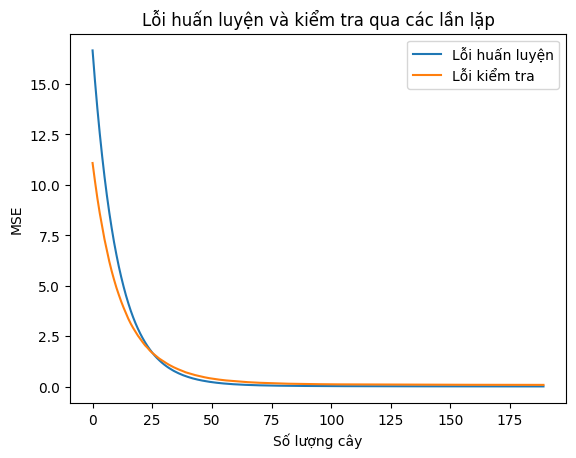

In [17]:
# Lấy thông tin về lỗi huấn luyện trong quá trình huấn luyện
train_loss = reg.train_score_

# Tính toán lỗi kiểm tra (test_loss) cho mỗi giai đoạn của quá trình huấn luyện
test_loss = []
for y_pred_stage in reg.staged_predict(X_test):
    mse = mean_squared_error(y_test, y_pred_stage)
    test_loss.append(mse)

# Vẽ biểu đồ lỗi huấn luyện và kiểm tra qua các lần lặp
plt.figure()
plt.plot(train_loss, label='Lỗi huấn luyện')
plt.plot(test_loss, label='Lỗi kiểm tra')
plt.xlabel('Số lượng cây')
plt.ylabel('MSE')
plt.title('Lỗi huấn luyện và kiểm tra qua các lần lặp')
plt.legend()
plt.show()



- Lỗi của tập kiểm tra ban thấp hơn tập huấn luyện trước giá trị số lượng cây khoảng 20 
- Sau giá trị số lượng cây 20 lỗi của tập kiểm tra cao hơn tập huấn luyện

In [18]:
# Tính toán các chỉ số MAE, MSE, RMSE, R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Thực hiện cross-validation MAE với 5-fold cross-validation
cv_mae = np.abs(cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error'))


# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# In kết quả ra màn hình với 4 chữ số thập phân
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print(f"\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")

# Bạn cũng có thể in ra số vòng lặp thực tế trước khi dừng sớm nếu quá trình huấn luyện bị dừng sớm
print(f"\nSố vòng lặp trước khi dừng sớm: {reg.n_estimators_}")

Train MAE: 0.0954
Train MSE: 0.1097
Train RMSE: 0.3312
Train R^2: 0.9940

So sánh:
Train MAE: 0.0954 vs Test MAE: 0.1300
Train MSE: 0.1097 vs Test MSE: 0.0874
Train RMSE: 0.3312 vs Test RMSE: 0.2956
Train R^2: 0.9940 vs Test R^2: 0.9921

Số vòng lặp trước khi dừng sớm: 190


- MAE của tập huấn luyện là 0.0944, thấp hơn so với MAE của tập kiểm tra là 0.1500 và MAE của kiểm định chéo là 0.2203. 
- Điều này cho thấy rằng mô hình hoạt động tốt trên tập huấn luyện nhưng kém hơn trên tập kiểm tra và kiểm định chéo.
- MSE của tập huấn luyện là 0.0407, thấp hơn so với MSE của tập kiểm tra là 0.0719.
- Giá trị R^2 của tập huấn luyện là 0.9977, rất gần với 1, R^2 của tập kiểm tra là 0.9944, vẫn là một giá trị cao, nhưng hiệu suất thấp hơn một chút so với tập huấn luyện.

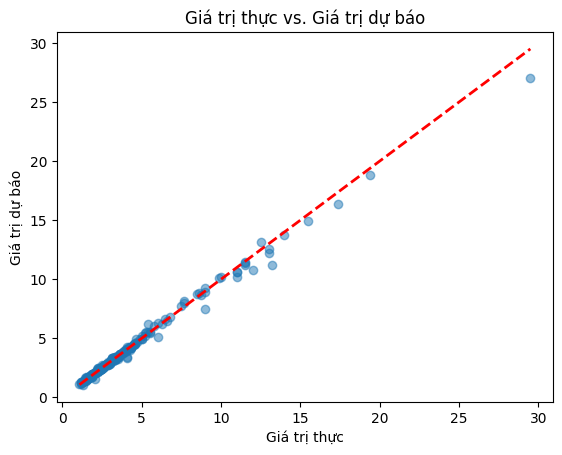

In [19]:
# Biểu đồ phân tán giữa giá trị thực và giá trị dự báo
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự báo')
plt.title('Giá trị thực vs. Giá trị dự báo')

# Vẽ đường chéo (45 độ) trên biểu đồ
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.show()

- Giá trị dự đoán tập trung quanh đường chéo 45 độ. Giá càng tăng khả năng rời xa đường chéo càng cao, nhưng đã thấp hơn so với mô hình trước khi hiệu chỉnh

In [20]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100

# Chuyển đổi thành DataFrame
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}

A = pd.DataFrame(data)

# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)

# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])

# Hiển thị DataFrame đã sắp xếp
B

,Gia du doan,Gia thuc,% sai lech
90,3.650806,3.65,0.0221
1146,11.504162,11.50,0.0362
423,1.290542,1.29,0.0420
173,6.803623,6.80,0.0533
479,2.797891,2.80,0.0753
...,...,...,...
518,3.447207,4.10,15.9218
727,7.511253,9.00,16.5416
151,3.356647,4.08,17.7292
851,1.058895,1.30,18.5466


- Sai lệch giao động từ 0.0189 đến 29.6814 giảm so với trước khi hiệu chỉnh

In [21]:
B['% sai lech'].describe()

count    258.000000
mean       3.007447
std        3.592849
min        0.022100
25%        0.726525
50%        1.799400
75%        3.862400
max       23.197200
Name: % sai lech, dtype: float64

- Số lượng mẫu trong tập dữ liệu là 258
- Độ lệch chuẩn là 4.195034, khá lớn so với giá trị trung bình. 
- Điều này cho thấy dữ liệu có sự phân tán cao, và có thể có một số giá trị lệch xa khỏi giá trị trung bình.
- 75% giá trị sai số dưới mức 4.527375, giảm so với trước khi hiệu chỉnh

In [22]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

0.2955699015454268

- Sai lệch giá trung bình khoảng 268 triệu giảm so với 430 triệu trước khi hiệu chỉnh

Sau khi hiệu chỉnh, mô hình hoạt động tốt hơn. Dự đoán giá giảm sai lệch, chính xác hơn

### Test mô hình

## RandomForestRegressor 

Test MAE: 0.1851
Test MSE: 0.2907
Test RMSE: 0.5392
Test R^2: 0.9829
Cross-Validation MAE: 0.2148
Train MAE: 0.0755
Train MSE: 0.0568
Train RMSE: 0.2382
Train R^2: 0.9967

So sánh:
Train MAE: 0.0755 vs Test MAE: 0.1851
Train MSE: 0.0568 vs Test MSE: 0.2907
Train RMSE: 0.2382 vs Test RMSE: 0.5392
Train R^2: 0.9967 vs Test R^2: 0.9829
Cross-Validation MAE: 0.2148


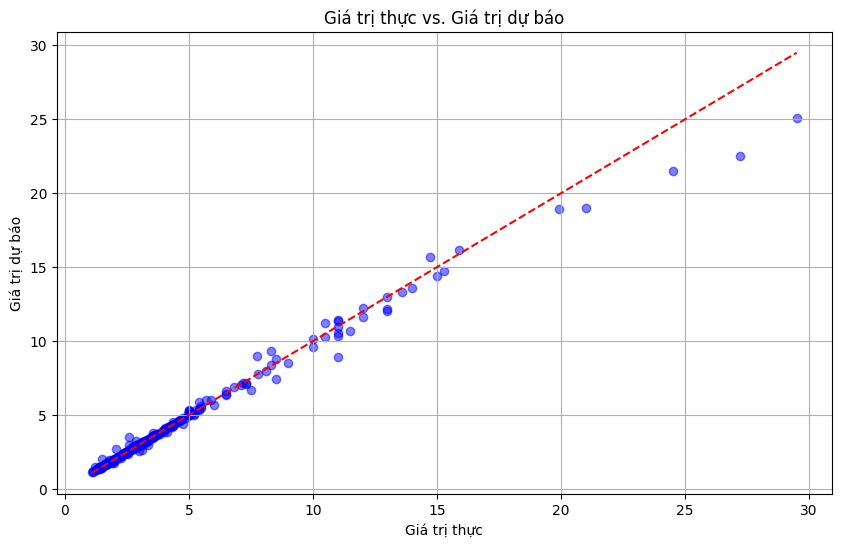

In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả định `frame_encoded` là một DataFrame chứa dữ liệu đã chuẩn hóa
data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)
reg = RandomForestRegressor(random_state=365)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# In ra các chỉ số
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2: {r2:.4f}")

# Thực hiện cross-validation MAE với 5-fold cross-validation
cv_mae = np.abs(cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error'))

# In ra giá trị MAE trung bình của cross-validation
print(f"Cross-Validation MAE: {np.mean(cv_mae):.4f}")

# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# In kết quả ra màn hình
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print("\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")
print(f"Cross-Validation MAE: {np.mean(cv_mae):.4f}")

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự báo')
plt.title('Giá trị thực vs. Giá trị dự báo')
plt.grid(True)
plt.show()


In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả sử `frame` là DataFrame chứa dữ liệu đã chuẩn hóa
data = frame

# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=365)

# Chia tập kiểm tra thành nhiều phần nhỏ hơn (ví dụ, 5 phần)
num_splits = 10
X_test_splits = np.array_split(X_test, num_splits)
y_test_splits = np.array_split(y_test, num_splits)

# Khởi tạo mô hình RandomForestRegressor
reg = RandomForestRegressor(random_state=365)

# Huấn luyện mô hình trên tập huấn luyện
reg.fit(X_train, y_train)

# Khởi tạo các danh sách để lưu trữ kết quả
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# Đánh giá mô hình trên từng phần của tập kiểm tra
for i in range(num_splits):
    X_test_part = X_test_splits[i]
    y_test_part = y_test_splits[i]
    y_pred_part = reg.predict(X_test_part)
    
    mae = mean_absolute_error(y_test_part, y_pred_part)
    mse = mean_squared_error(y_test_part, y_pred_part)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_part, y_pred_part)
    
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    # In kết quả cho từng phần của tập kiểm tra
    print(f'Part {i+1}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R^2={r2:.2f}')

# Tính toán và in kết quả trung bình
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_r2 = np.mean(r2_list)

print("\nAverage metrics across all test sets:")
print(f'Mean Absolute Error (MAE): {mean_mae:.2f}')
print(f'Mean Squared Error (MSE): {mean_mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {mean_rmse:.2f}')
print(f'R^2 Score: {mean_r2:.2f}')


C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\QUOC CUONG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Part 1: MAE=0.13, MSE=0.09, RMSE=0.30, R^2=0.99
Part 2: MAE=0.24, MSE=0.64, RMSE=0.80, R^2=0.98
Part 3: MAE=0.32, MSE=0.65, RMSE=0.81, R^2=0.97
Part 4: MAE=0.13, MSE=0.08, RMSE=0.28, R^2=0.99
Part 5: MAE=0.19, MSE=0.11, RMSE=0.33, R^2=0.98
Part 6: MAE=0.20, MSE=0.21, RMSE=0.46, R^2=0.98
Part 7: MAE=0.17, MSE=0.18, RMSE=0.43, R^2=0.98
Part 8: MAE=0.20, MSE=0.22, RMSE=0.47, R^2=0.98
Part 9: MAE=0.24, MSE=0.22, RMSE=0.47, R^2=0.98
Part 10: MAE=0.13, MSE=0.06, RMSE=0.24, R^2=0.99

Average metrics across all test sets:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.25
Root Mean Squared Error (RMSE): 0.46
R^2 Score: 0.98


- Biểu đồ này thể hiện mối quan hệ giữa giá trị thực và giá trị dự báo. Có thể thấy rằng dữ liệu thực tế và dự báo có sự biến động và tương quan. Đường xu hướng đỏ cho thấy một mô hình dự đoán tương đối tốt, nhưng còn một số điểm ngoại lai cách xa đường đỏ

In [109]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100

# Chuyển đổi thành DataFrame
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}

A = pd.DataFrame(data)

# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)

# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])

# Hiển thị DataFrame đã sắp xếp
print(B)

      Gia du doan  Gia thuc  % sai lech
1014       2.0000      2.00      0.0000
1099       5.0000      5.00      0.0000
1230       1.7500      1.75      0.0000
1132       5.0000      5.00      0.0000
824        3.3900      3.39      0.0000
...           ...       ...         ...
849       21.6930     27.20     20.2463
846        1.5108      1.20     25.9000
984        2.6210      2.07     26.6184
1215       3.4677      2.60     33.3731
1098       2.2028      1.50     46.8533

[258 rows x 3 columns]


In [110]:
B['% sai lech'].describe()


count    258.000000
mean       3.087831
std        5.337176
min        0.000000
25%        0.277600
50%        1.289600
75%        3.600350
max       46.853300
Name: % sai lech, dtype: float64

- Giá trị tối đa (max): 46.8533, là giá trị lớn nhất trong dữ liệu.
- Dựa vào các thông số này, có thể nhận thấy dữ liệu có sự phân tán khá lớn (độ lệch chuẩn lớn), với một số giá trị cao hơn giá trị trung bình và phân vị 75%. Điều này có thể gợi ý về sự không đồng đều trong dữ liệu, với một số mẫu có giá trị lớn hơn mức trung bình hoặc phổ biến.

In [111]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5


0.6039015639280364

- Bị lệch 600 triệu so với thực tế

### Hieu Chinh

In [ ]:
# Import các thư viện cần thiết
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

data = frame

X = data.drop(columns=['Gia']) 
y = data['Gia'] 

# Tạo danh sách các giá trị `random_state` để thử nghiệm
random_states = list(range(0, 3001))  # Danh sách từ 0 đến 3000 

# Khởi tạo biến để lưu trữ kết quả tốt nhất
best_mae = float('inf')  # Giá trị MAE tốt nhất (ban đầu là vô cùng)
best_random_state = None  # Giá trị `random_state` tốt nhất

# Lặp qua các giá trị `random_state` để tìm giá trị tốt nhất
for random_state in random_states:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)
    
    # Khởi tạo và huấn luyện mô hình RandomForestRegressor
    reg = RandomForestRegressor(random_state=random_state)
    reg.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = reg.predict(X_test)
    
    # Tính toán chỉ số MAE trên tập kiểm tra
    mae = mean_absolute_error(y_test, y_pred)
    
    # Kiểm tra nếu MAE của mô hình hiện tại tốt hơn MAE tốt nhất đã biết
    if mae < best_mae:
        best_mae = mae
        best_random_state = random_state
    
    # In kết quả của giá trị `random_state` hiện tại
    print(f"random_state = {random_state}: MAE = {mae:.4f}")

# In ra giá trị `random_state` tốt nhất và MAE tương ứng
print(f"\nGiá trị random_state tốt nhất: {best_random_state}")
print(f"MAE tốt nhất: {best_mae:.4f}")


### Test sau hieu chinh

Cross-Validation MAE: 0.2204
Train MAE: 0.0838
Train MSE: 0.0652
Train RMSE: 0.2554
Train R^2: 0.9965

So sánh:
Train MAE: 0.0838 vs Test MAE: 0.1053
Train MSE: 0.0652 vs Test MSE: 0.0632
Train RMSE: 0.2554 vs Test RMSE: 0.2514
Train R^2: 0.9965 vs Test R^2: 0.9934
Cross-Validation MAE: 0.2204


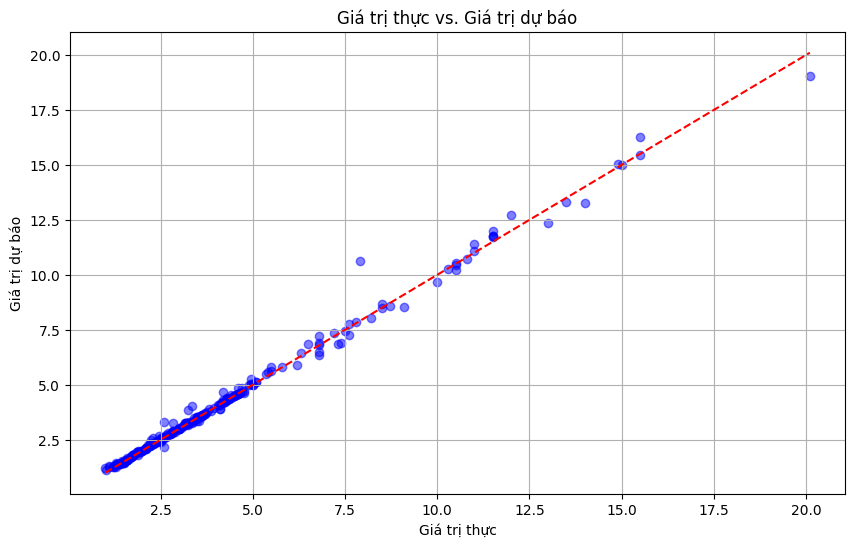

In [117]:
# Import các thư viện cần thiết
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Giả định `frame_encoded` là một DataFrame chứa dữ liệu đã chuẩn hóa.
data = frame
# Xác định đặc trưng (features) và nhãn (target)
X = data.drop(columns=['Gia'])  # Loại bỏ cột 'Gia' để lấy đặc trưng
y = data['Gia']  # Biến mục tiêu (giá đất)

# Bước 2: Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2233)

# Khởi tạo mô hình RandomForestRegressor
reg = RandomForestRegressor(random_state=2233)

# Huấn luyện mô hình trên tập huấn luyện
reg.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = reg.predict(X_test)

# Tính toán các chỉ số MAE, MSE, RMSE, R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Thực hiện cross-validation MAE với 5-fold cross-validation
cv_mae = np.abs(cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error'))

# In ra giá trị MAE trung bình của cross-validation với 4 chữ số thập phân
print(f"Cross-Validation MAE: {np.mean(cv_mae):.4f}")

# Tính toán các chỉ số MAE, MSE, RMSE, R^2 trên tập huấn luyện
y_train_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# In kết quả ra màn hình với 4 chữ số thập phân
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

# So sánh hiệu suất trên tập huấn luyện, tập kiểm tra và cross-validation
print(f"\nSo sánh:")
print(f"Train MAE: {train_mae:.4f} vs Test MAE: {mae:.4f}")
print(f"Train MSE: {train_mse:.4f} vs Test MSE: {mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} vs Test RMSE: {rmse:.4f}")
print(f"Train R^2: {train_r2:.4f} vs Test R^2: {r2:.4f}")
print(f"Cross-Validation MAE: {np.mean(cv_mae):.4f}")


# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự báo')
plt.title('Giá trị thực vs. Giá trị dự báo')
plt.grid(True)
plt.show()

- Biểu đồ này thể hiện mối quan hệ giữa giá trị thực và giá trị dự báo. Có thể thấy rằng dữ liệu thực tế và dự báo có sự biến động và tương quan. Đường xu hướng đỏ cho thấy một mô hình dự đoán tương đối tốt

In [118]:
# Tính phần trăm sai lệch giữa giá trị dự đoán và giá trị thực tế
perc = np.abs((y_pred - y_test) / y_test) * 100

# Chuyển đổi thành DataFrame
data = {'Gia du doan': y_pred,
        'Gia thuc': y_test.values,
        '% sai lech': perc}

A = pd.DataFrame(data)

# Làm tròn 4 chữ số sau dấu phẩy trong DataFrame
A['% sai lech'] = A['% sai lech'].round(4)

# Sắp xếp DataFrame theo phần trăm sai lệch
B = A.sort_values(by=['% sai lech'])

# Hiển thị DataFrame đã sắp xếp
print(B)

      Gia du doan  Gia thuc  % sai lech
735        2.4500      2.45      0.0000
1161       5.0000      5.00      0.0000
1233       1.7000      1.70      0.0000
265        2.9999      3.00      0.0033
899        2.2999      2.30      0.0043
...           ...       ...         ...
882        3.8735      3.25     19.1846
857        4.0430      3.35     20.6866
293        1.2206      1.00     22.0600
1215       3.2861      2.60     26.3885
384       10.6400      7.90     34.6835

[258 rows x 3 columns]


In [119]:
B['% sai lech'].describe()

count    258.000000
mean       2.504834
std        4.302445
min        0.000000
25%        0.302400
50%        0.914300
75%        2.925650
max       34.683500
Name: % sai lech, dtype: float64

- Giá trị tối đa (max): Giá trị lớn nhất của "% sai lệch" là 34.6835%, cho thấy có một số dự đoán có sai lệch rất lớn so với giá trị thực tế.
giảm sau khi hiệu chỉnh

In [120]:
(sum((reg.predict(X_test) - y_test)**2)/len(y_test))**0.5

0.2514346785884946

- Giá lệch so với thực tế là khoảng 250 triệu
- Giảm rất nhiều so với khi chưa hiệu chỉnh khoảng 350 triệu